# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [16]:
path = 'Data-clustering.csv'
df = pd.read_csv(r'D:\proyek-ml\Data\Dataset.csv')
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:6: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('Data\Dataset.csv')


=== BASIC INFORMATION ===

1. Jumlah baris dan kolom: (20000, 26)

2. 5 baris pertama data:
  Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        N   
1          60        12000                 74     164  ...        N   
2          95        12000                 93     179  ...        N   
3          78        19000                 32     160  ...        N   
4          72         4000                173     179  ...        N   

  Medical issue On

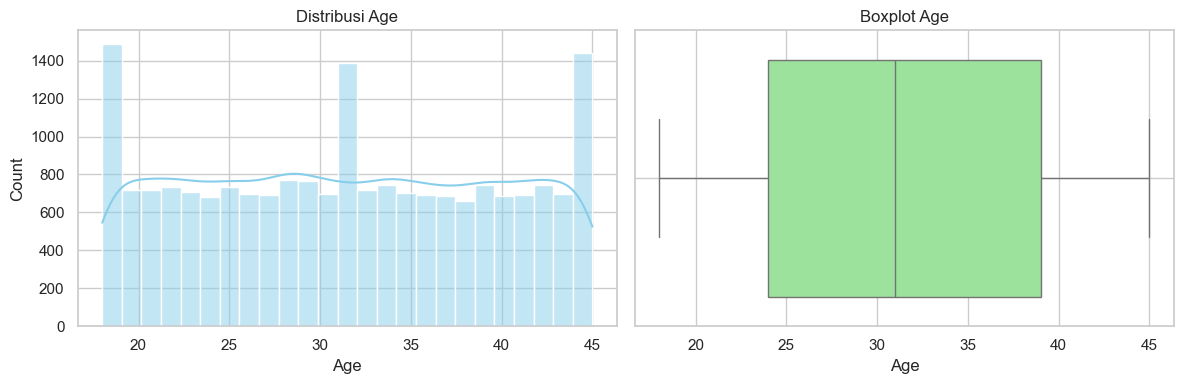

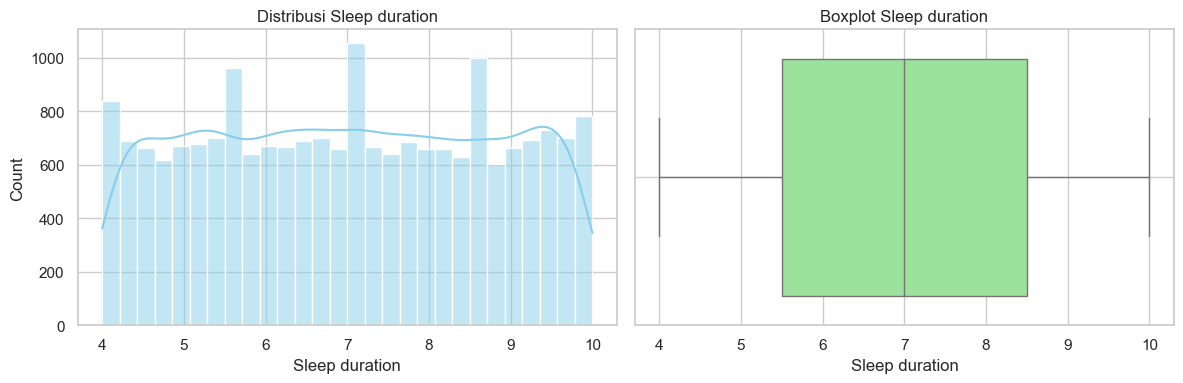

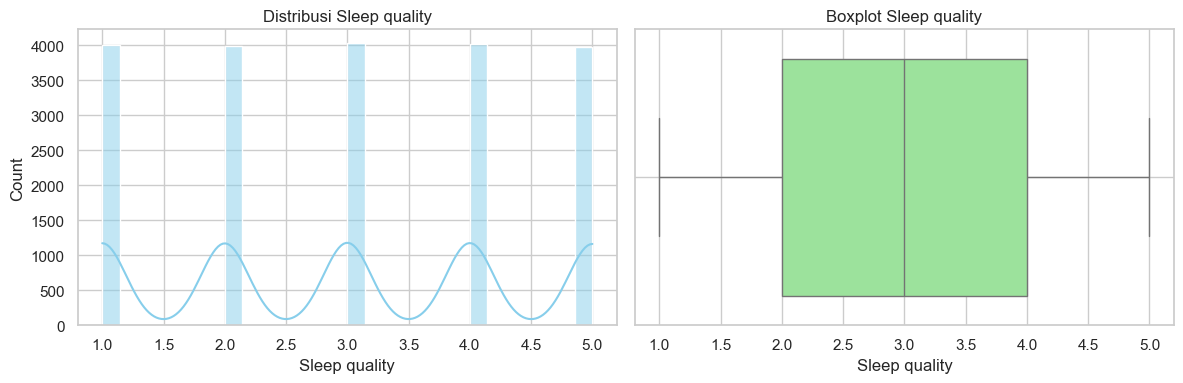

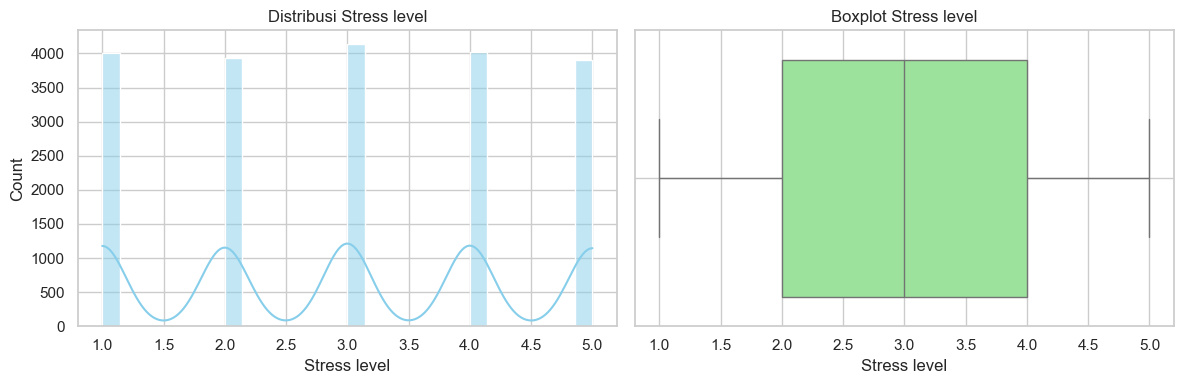

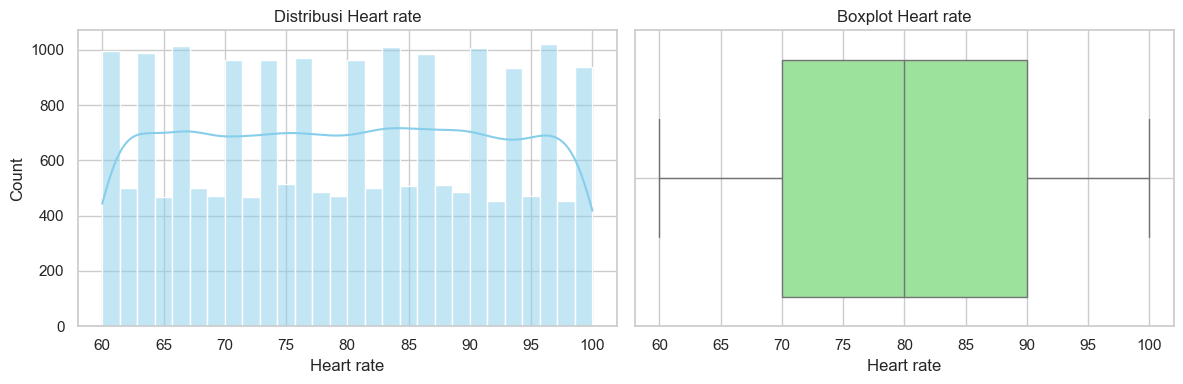

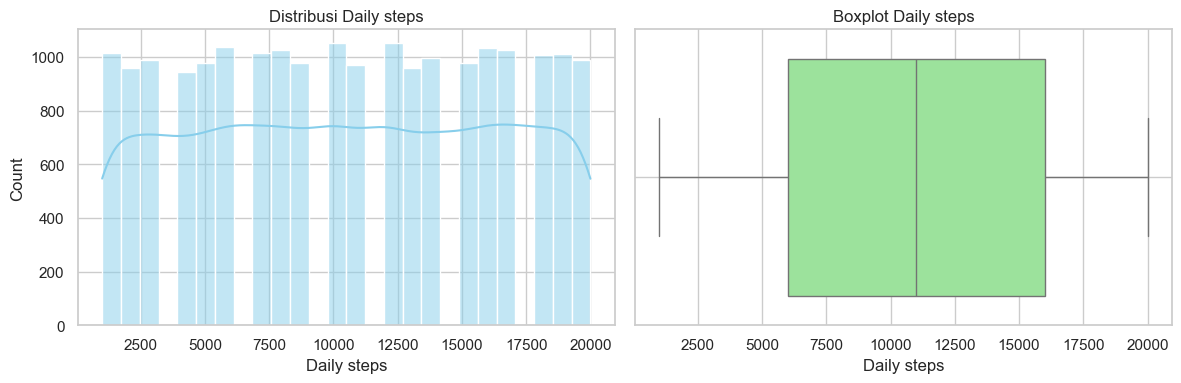

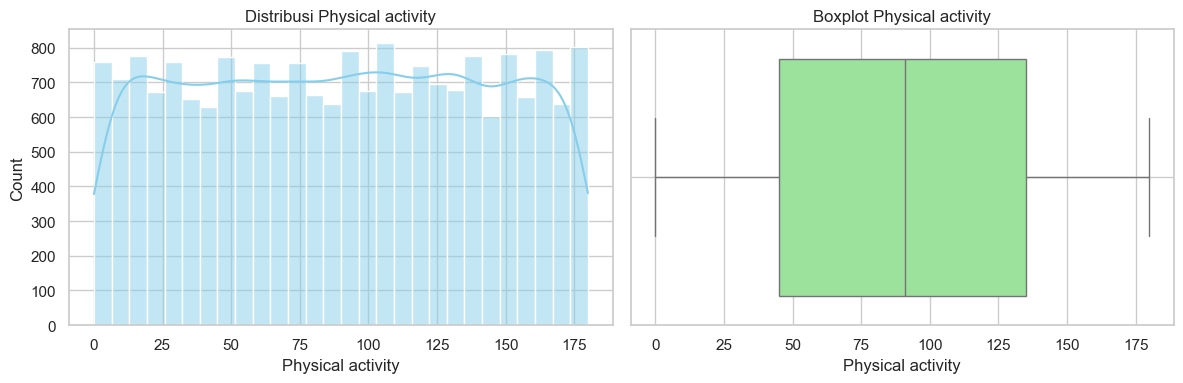

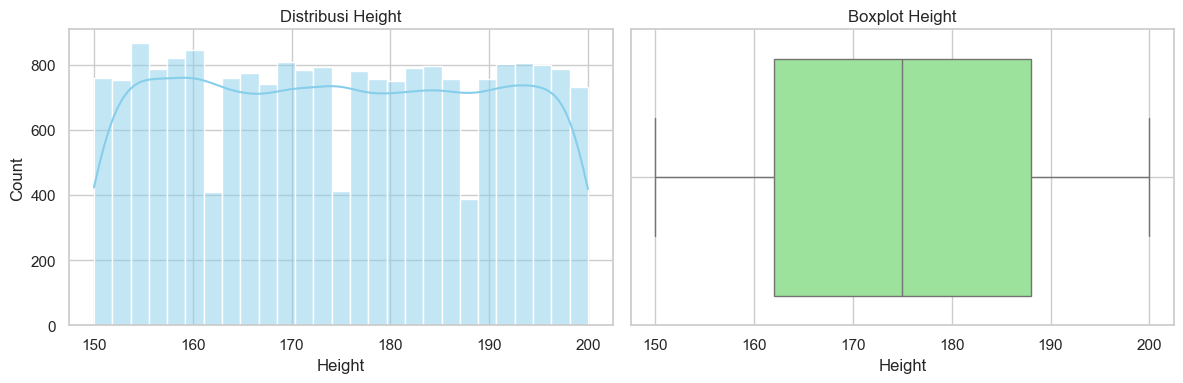

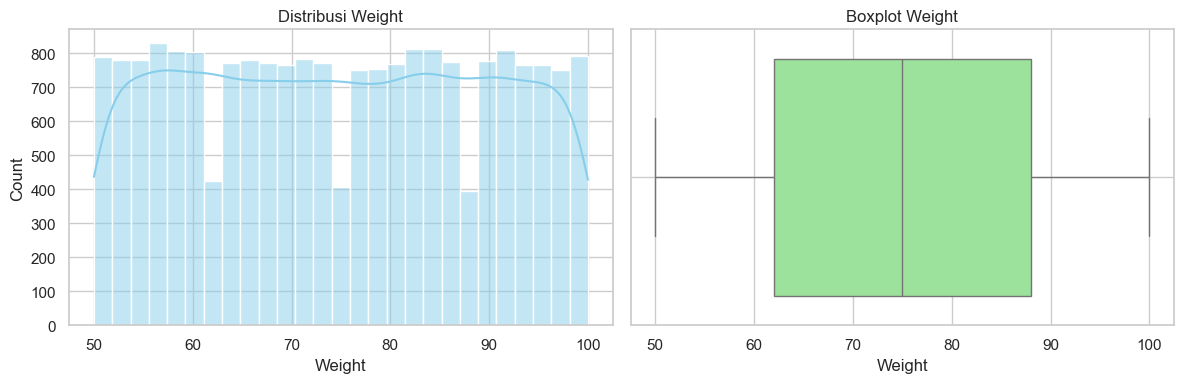

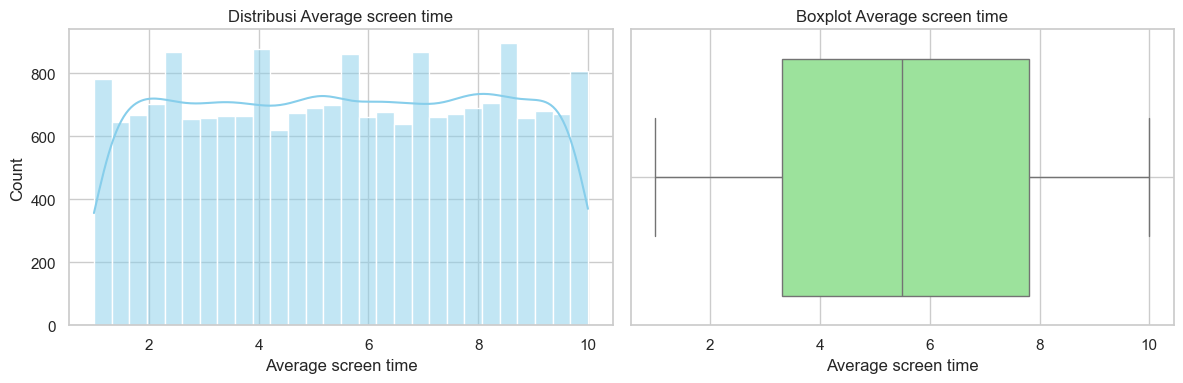

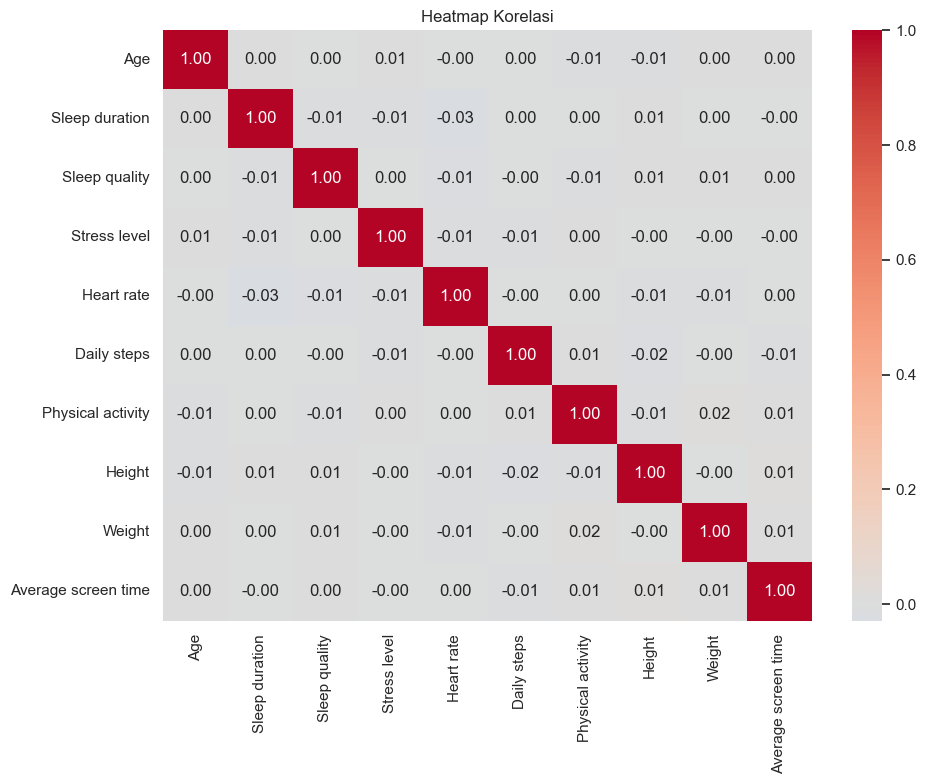


=== CATEGORICAL ANALYSIS ===


C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


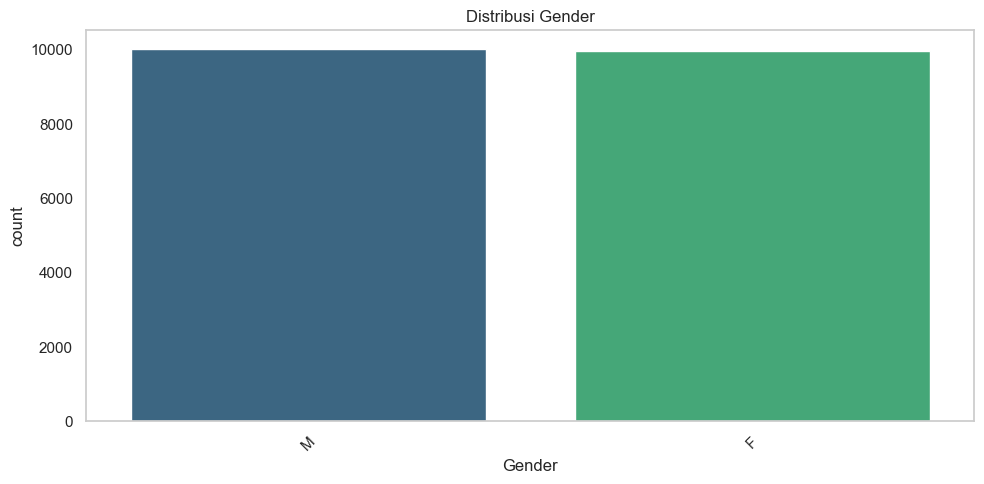

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


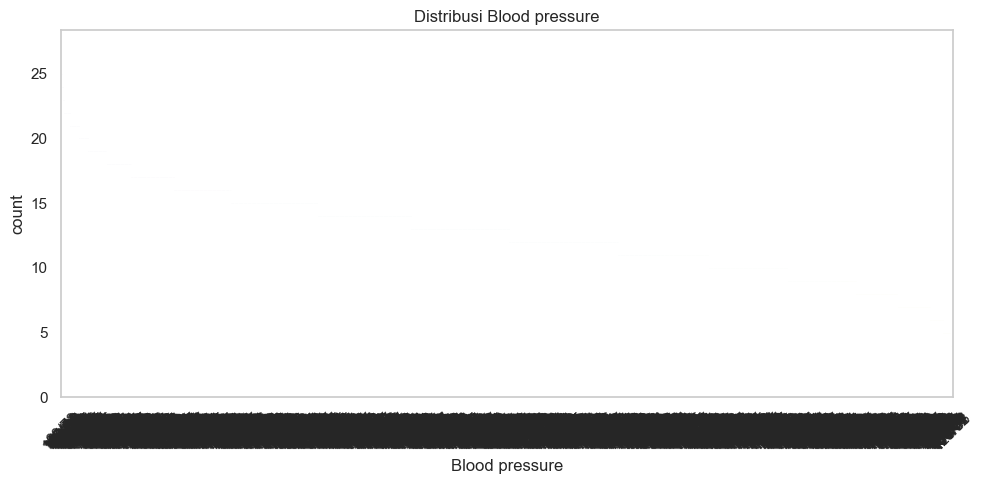

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


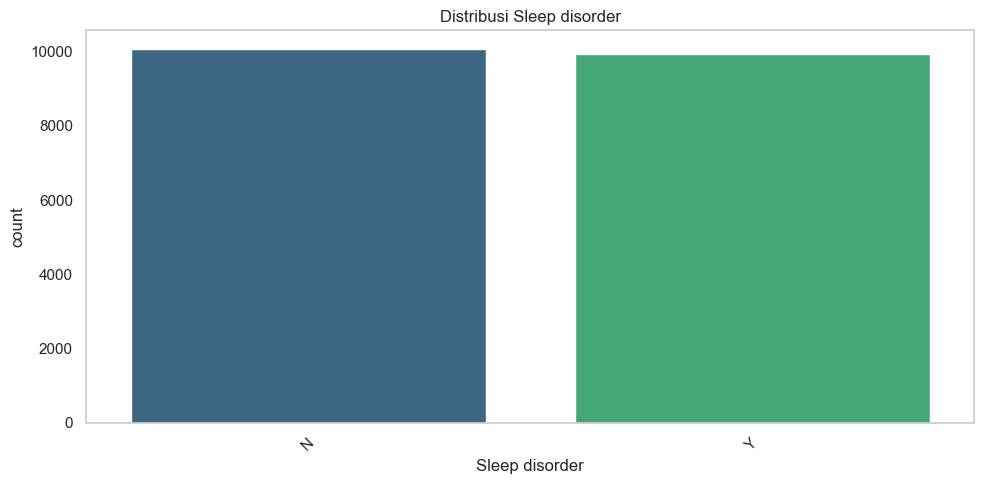

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


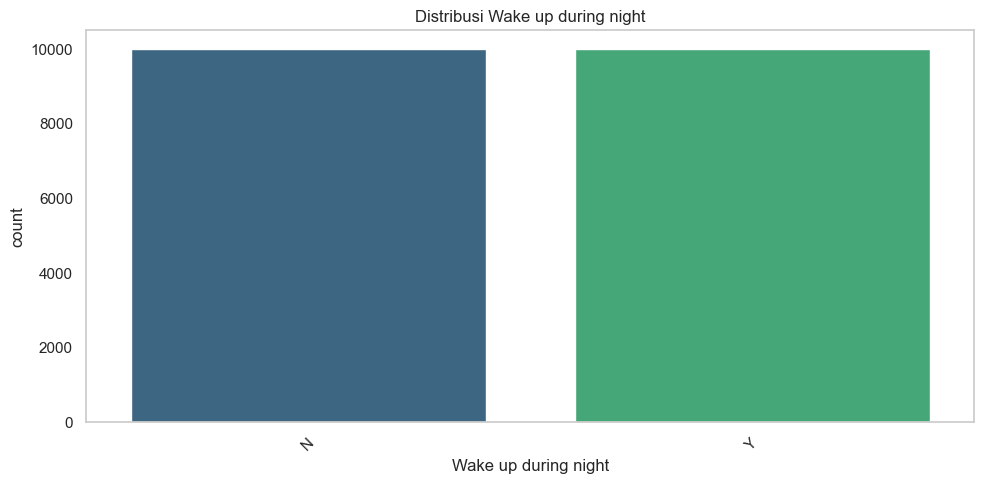

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


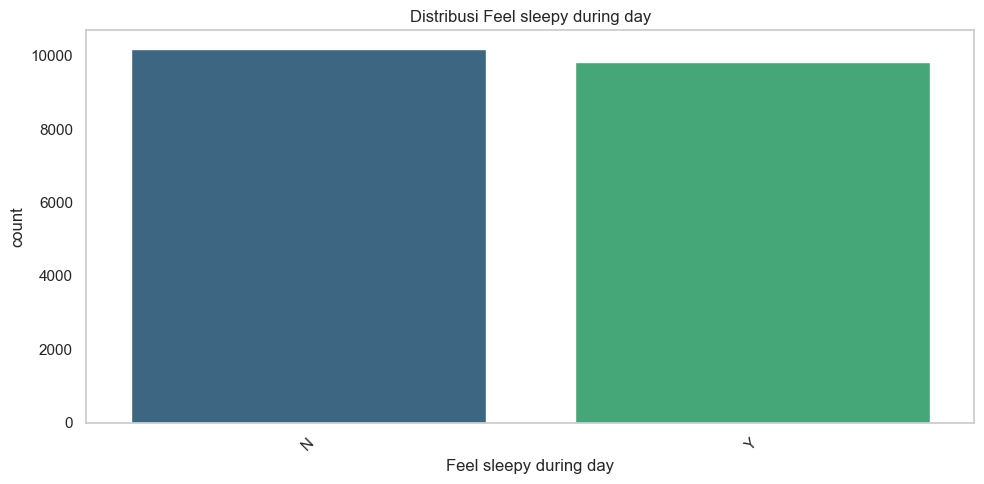

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


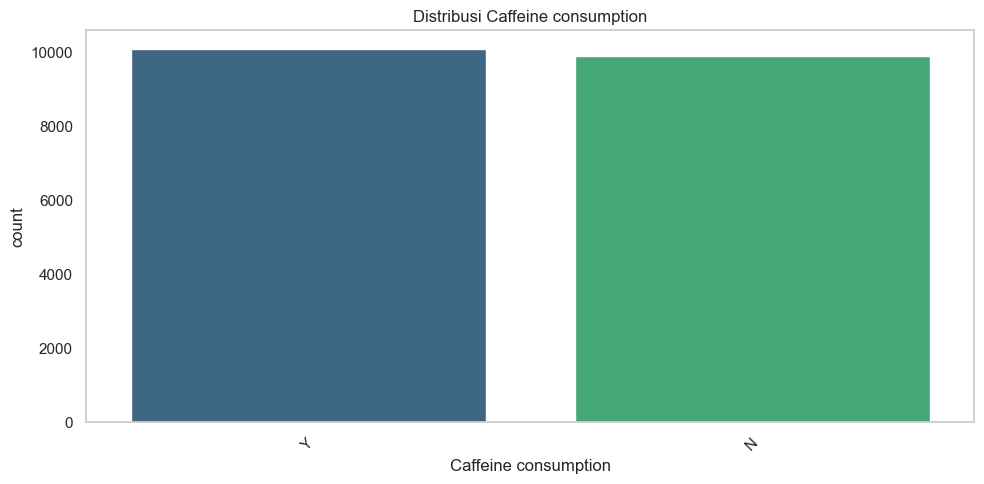

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


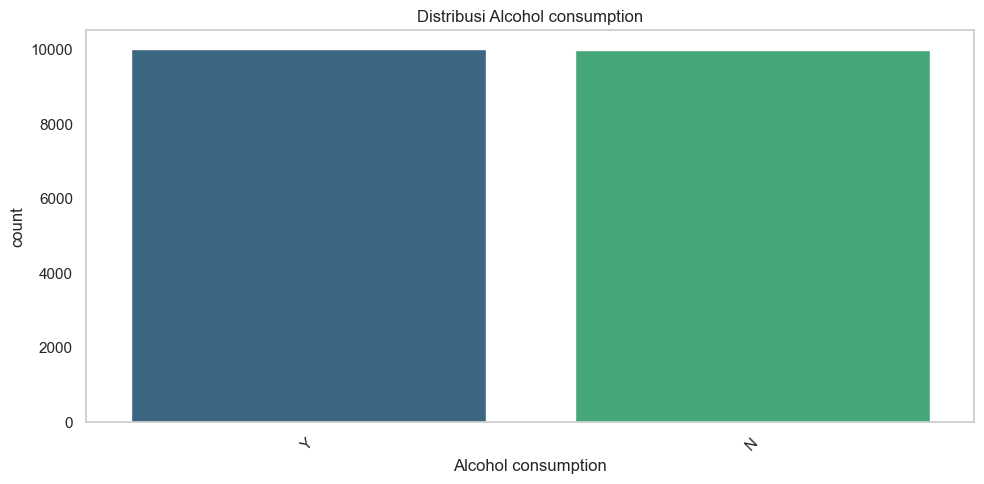

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


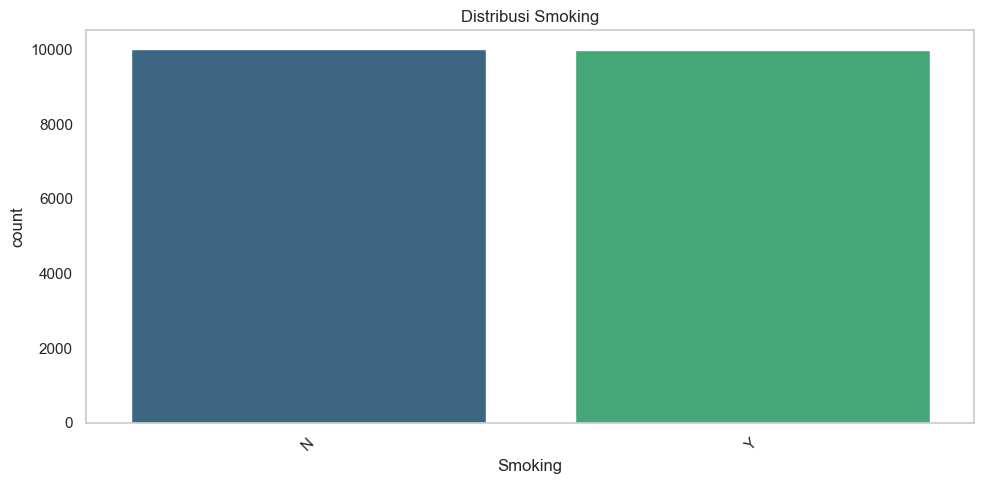

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


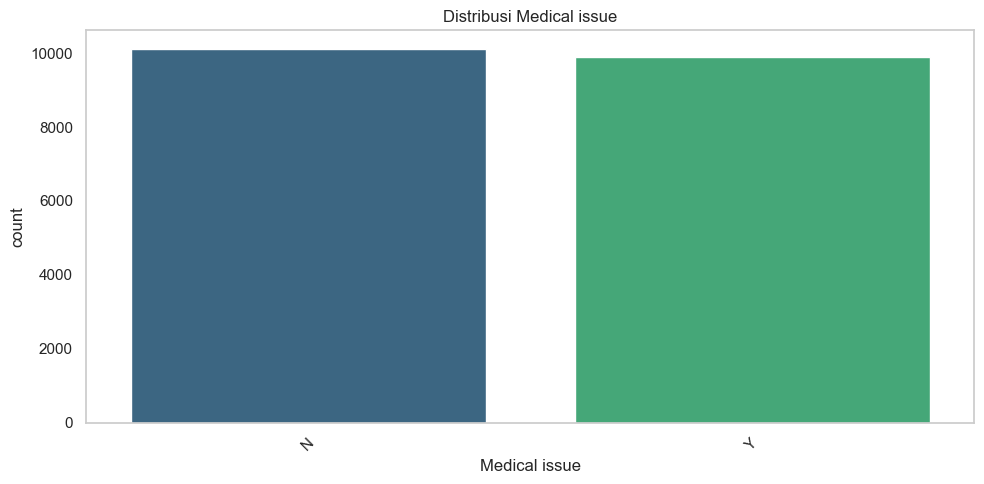

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


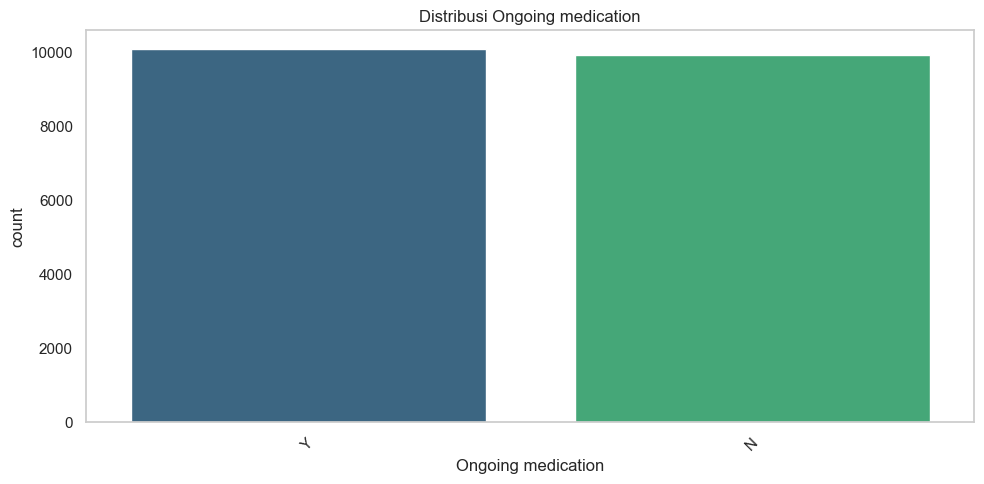

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


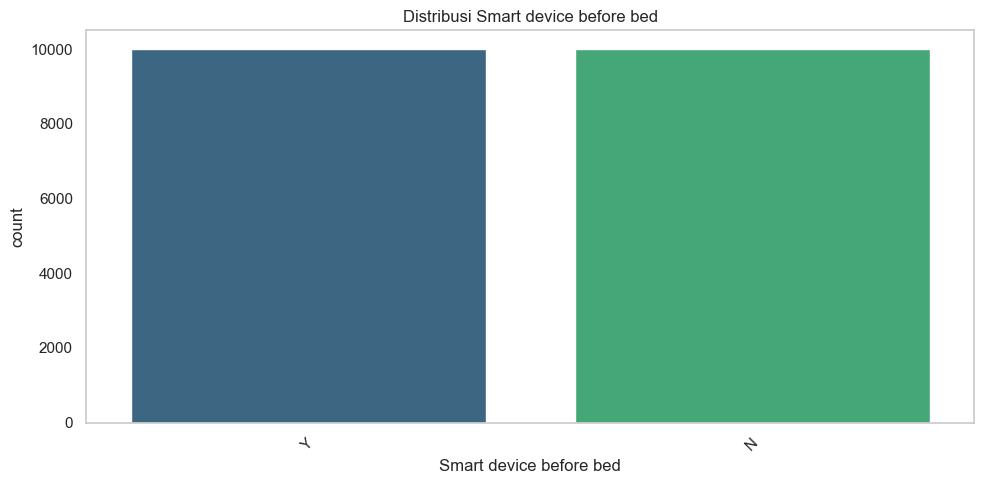

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


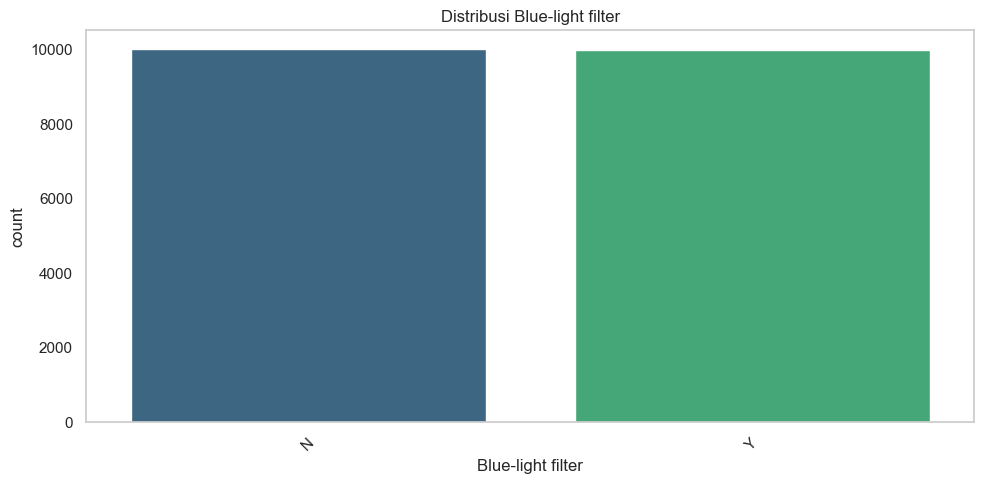

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


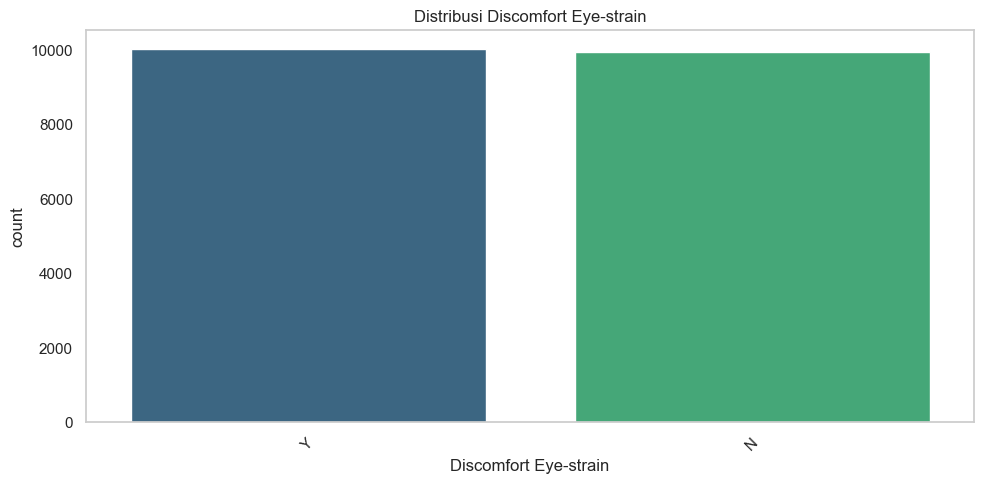

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


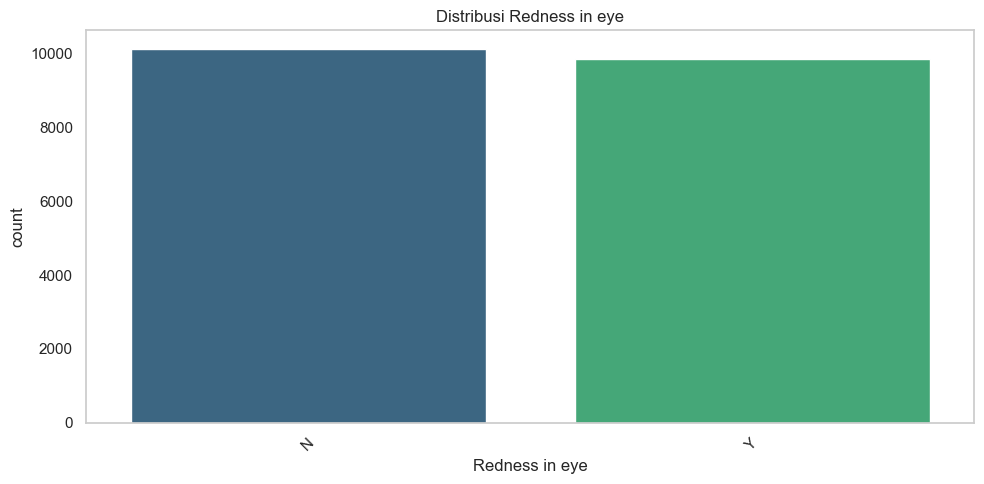

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


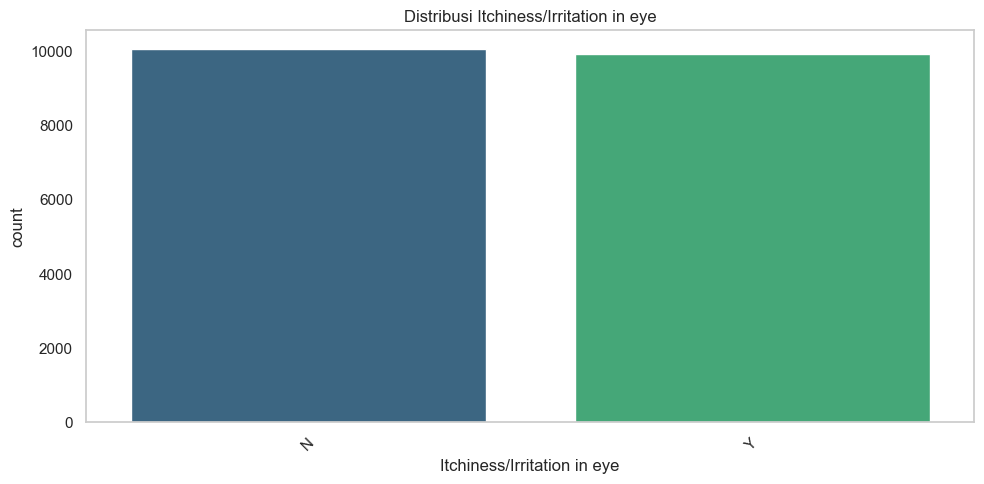

C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\1782072889.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


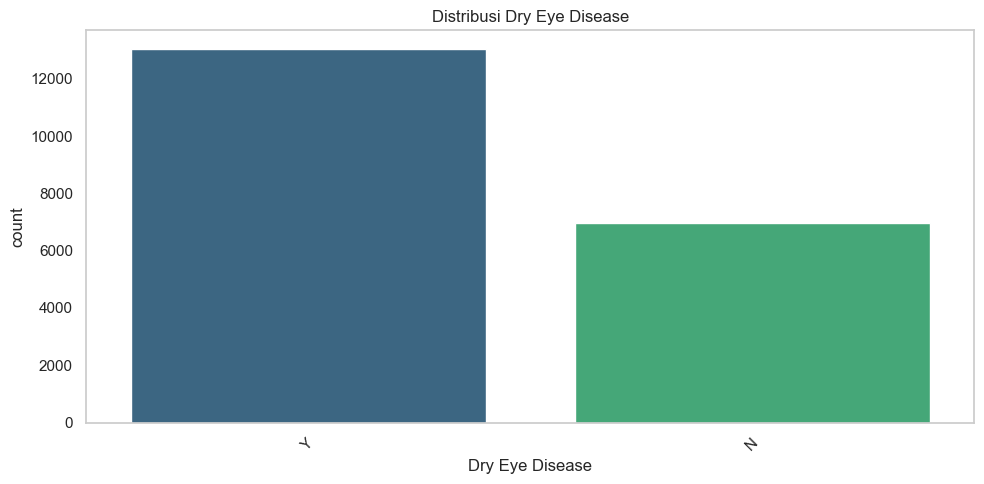

In [17]:
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Load data
df = pd.read_csv('Data\Dataset.csv')

# Basic info
print("=== BASIC INFORMATION ===")
print("\n1. Jumlah baris dan kolom:", df.shape)
print("\n2. 5 baris pertama data:")
print(df.head())
print("\n3. Tipe data setiap kolom:")
print(df.dtypes)
print("\n4. Jumlah unique values per kolom:")
print(df.nunique())

# Missing values analysis
print("\n=== MISSING VALUES ANALYSIS ===")
missing = df.isnull().sum()
print("\n1. Jumlah missing values per kolom:")
print(missing)
print("\n2. Persentase missing values:")
print((missing/len(df))*100)

# Numerical analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if not numerical_cols.empty:
    print("\n=== NUMERICAL ANALYSIS ===")
    print("\n1. Statistik deskriptif:")
    print(df[numerical_cols].describe())
    
    # Outlier analysis
    print("\n2. Outlier analysis:")
    for col in numerical_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        print(f"{col}: IQR={iqr:.2f}, Bounds=[{q1-1.5*iqr:.2f}, {q3+1.5*iqr:.2f}]")
    
    # Visualization
    for col in numerical_cols:
        plt.figure(figsize=(12,4))
        
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Distribusi {col}')
        plt.grid(True)
        
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Boxplot {col}')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    # Correlation
    if len(numerical_cols) > 1:
        plt.figure(figsize=(10,8))
        sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', center=0)
        plt.title('Heatmap Korelasi')
        plt.tight_layout()
        plt.show()

# Categorical analysis
categorical_cols = df.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    print("\n=== CATEGORICAL ANALYSIS ===")
    for col in categorical_cols:
        plt.figure(figsize=(10,5))
        sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
        plt.title(f'Distribusi {col}')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

=== DATA PREPROCESSING ===
Data loaded successfully. Shape: (20000, 26)

=== INITIAL DATA CHECK ===
First 5 rows:
  Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Smoking  \
0          67         3000                 31     161  ...        N   
1          60        12000                 74     164  ...        N   
2          95        12000                 93     179  ...        N   
3          78        19000                 32     160  ...        N   
4          72         4000                173     179  ...        N 

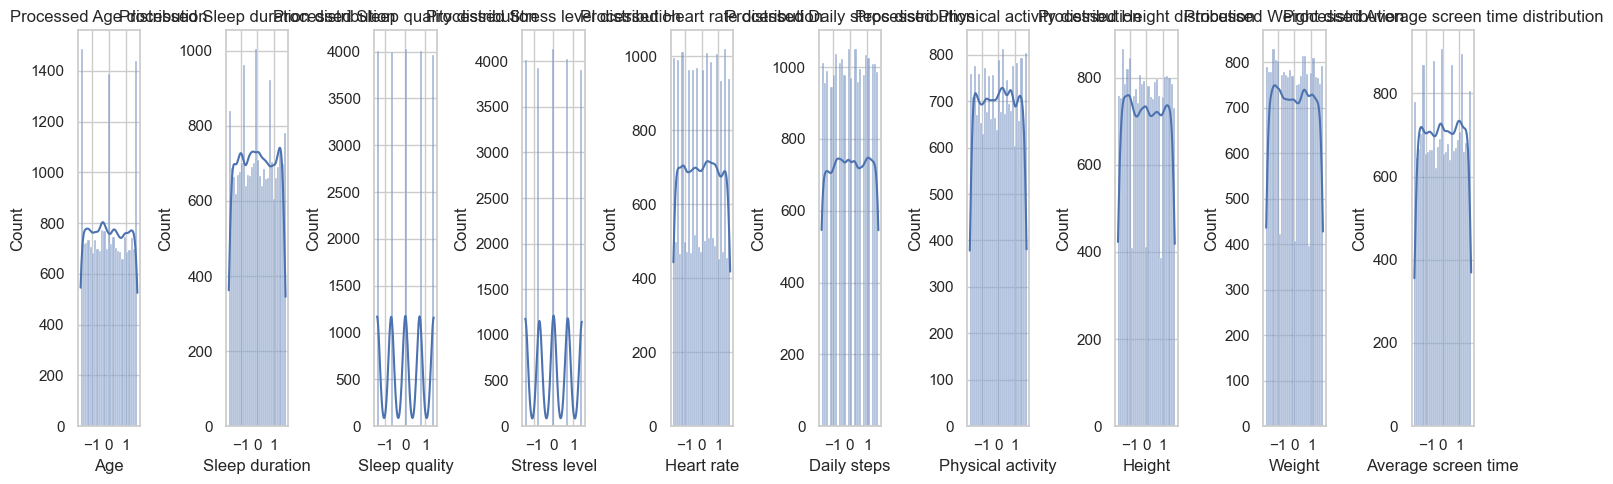

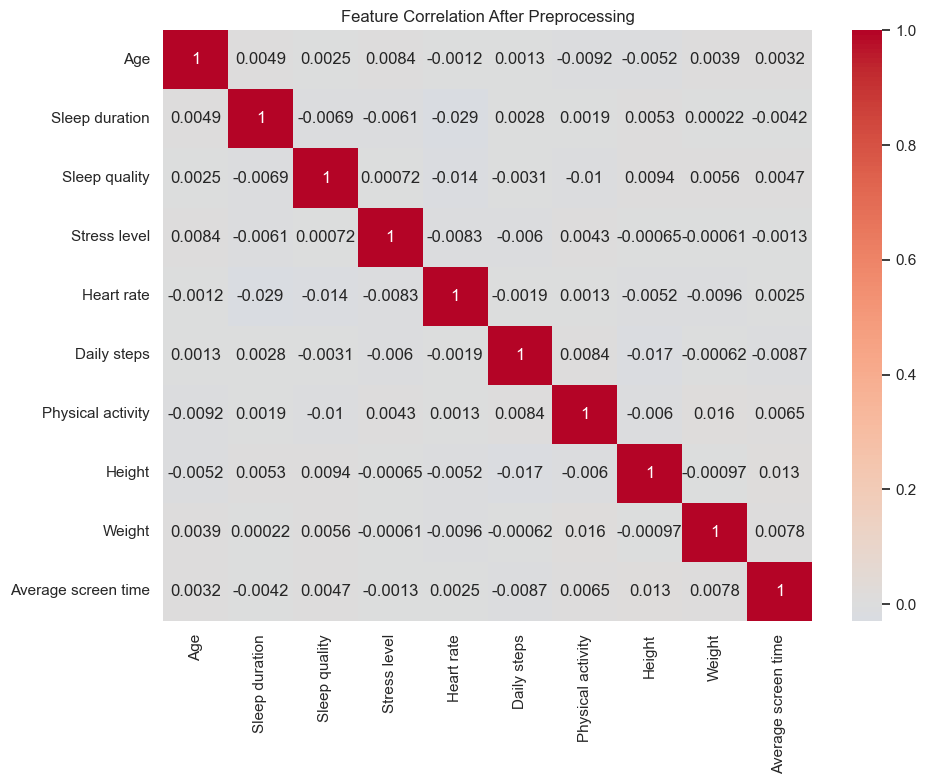


=== PREPROCESSING COMPLETE ===


In [18]:
# 1. Load Data
try:
    df = pd.read_csv('Data/Dataset.csv')
    print("=== DATA PREPROCESSING ===")
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("Error: File not found. Please check the path.")
    exit()
except Exception as e:
    print(f"Error loading data: {str(e)}")
    exit()

# 2. Initial Data Check
print("\n=== INITIAL DATA CHECK ===")
print("First 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# 3. Handle ID Columns
print("\n=== HANDLING ID COLUMNS ===")
id_patterns = ['ID', 'Id', 'id', 'Number', 'Num', 'No', 'Code', 'Address']
id_cols = [col for col in df.columns if any(pattern in col for pattern in id_patterns)]

if id_cols:
    print(f"Removing ID columns: {id_cols}")
    df.drop(columns=id_cols, inplace=True)
else:
    print("No ID columns found")

# 4. Handle Missing Values
print("\n=== HANDLING MISSING VALUES ===")
# Numerical columns - impute with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Numerical column '{col}': filled {df[col].isnull().sum()} missing values with median {median_val:.2f}")

# Categorical columns - impute with mode
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Categorical column '{col}': filled {df[col].isnull().sum()} missing values with mode '{mode_val}'")

# 5. Handle Duplicates
print("\n=== HANDLING DUPLICATES ===")
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
removed_rows = initial_rows - df.shape[0]
print(f"Removed {removed_rows} duplicate rows")

# 6. Handle Outliers
print("\n=== HANDLING OUTLIERS ===")
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        median_val = df[col].median()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val
        print(f"Column '{col}': Replaced {len(outliers)} outliers with median {median_val:.2f}")

# 7. Feature Scaling
print("\n=== FEATURE SCALING ===")
scaler = StandardScaler()  # Can be changed to MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("Numerical columns scaled using StandardScaler")

# 8. Feature Encoding
print("\n=== FEATURE ENCODING ===")
for col in cat_cols:
    if df[col].nunique() <= 10:
        df = pd.get_dummies(df, columns=[col], prefix=[col])
        print(f"Categorical column '{col}': One-hot encoded")
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Categorical column '{col}': Label encoded (unique values: {df[col].nunique()})")

# 9. Binning Numerical Features
print("\n=== BINNING NUMERICAL FEATURES ===")
if len(num_cols) > 0:
    # Bin the first numerical column
    col_to_bin = num_cols[0]
    bins = 4
    df[f'{col_to_bin}_binned'] = pd.cut(df[col_to_bin], bins=bins, labels=[f'Bin_{i}' for i in range(1, bins+1)])
    df = pd.get_dummies(df, columns=[f'{col_to_bin}_binned'], prefix=[f'{col_to_bin}_level'])
    print(f"Column '{col_to_bin}': Binned into {bins} categories and one-hot encoded")

# 10. Final Data Check
print("\n=== FINAL DATA CHECK ===")
print("Processed data shape:", df.shape)
print("\nFirst 5 rows of processed data:")
print(df.head())
print("\nData types after preprocessing:")
print(df.dtypes)

# 11. Visualize Processed Data
print("\n=== VISUALIZATION OF PROCESSED DATA ===")
# Distribution of numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Processed {col} distribution')
plt.tight_layout()
plt.show()

# Correlation heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation After Preprocessing')
    plt.tight_layout()
    plt.show()

print("\n=== PREPROCESSING COMPLETE ===")

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [19]:
# Load data
df = pd.read_csv('Data\Dataset.csv')

# Pilih kolom numerik dan normalisasi
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Bangun model clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)  # Jumlah cluster sementara
kmeans.fit(df_normalized)

# Tambahkan label cluster ke data
df['Cluster'] = kmeans.labels_
print("Data dengan Cluster:")
print(df.head())

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Salwa\AppData\Local\Temp\ipykernel_7208\3955441526.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('Data\Dataset.csv')


Data dengan Cluster:
  Gender  Age  Sleep duration  Sleep quality  Stress level Blood pressure  \
0      F   24             9.5              2             1         137/89   
1      M   39             9.6              2             3         108/64   
2      F   45             5.4              1             5         134/81   
3      F   45             5.4              4             5         110/90   
4      F   42             5.7              3             2          99/67   

   Heart rate  Daily steps  Physical activity  Height  ...  Medical issue  \
0          67         3000                 31     161  ...              Y   
1          60        12000                 74     164  ...              Y   
2          95        12000                 93     179  ...              N   
3          78        19000                 32     160  ...              Y   
4          72         4000                173     179  ...              Y   

  Ongoing medication Smart device before bed Average 

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

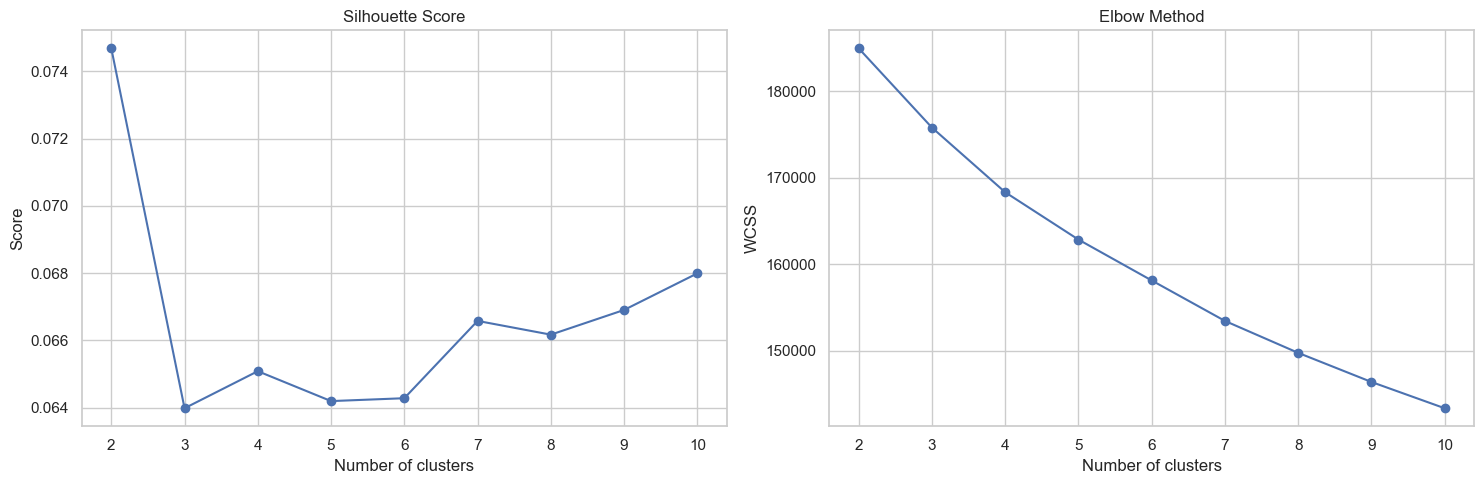

In [20]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fungsi evaluasi cluster
def evaluate_clusters(data, max_clusters=10):
    silhouette_scores = []
    wcss = []  # Within-Cluster Sum of Square
    
    for n_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        
        # Hitung silhouette score
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        # Hitung WCSS
        wcss.append(kmeans.inertia_)
    
    # Plot hasil evaluasi
    plt.figure(figsize=(15, 5))
    
    # Plot Silhouette Score
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    
    # Plot Elbow Method
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters+1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    
    plt.tight_layout()
    plt.show()

# Jalankan evaluasi
evaluate_clusters(df_normalized)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
from sklearn.feature_selection import VarianceThreshold

def feature_selection(data, threshold=0.1):
    # Seleksi fitur dengan variance threshold
    selector = VarianceThreshold(threshold=threshold)
    selected_data = selector.fit_transform(data)
    
    # Dapatkan kolom yang terpilih
    selected_columns = data.columns[selector.get_support()]
    print(f"Selected features: {list(selected_columns)}")
    
    return pd.DataFrame(selected_data, columns=selected_columns)

# Jalankan feature selection
df_selected = feature_selection(df_normalized)

# Bandingkan hasil sebelum dan sesudah feature selection
print("\nShape sebelum feature selection:", df_normalized.shape)
print("Shape setelah feature selection:", df_selected.shape)

Selected features: ['Age', 'Sleep duration', 'Sleep quality', 'Stress level', 'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight', 'Average screen time']

Shape sebelum feature selection: (20000, 10)
Shape setelah feature selection: (20000, 10)


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

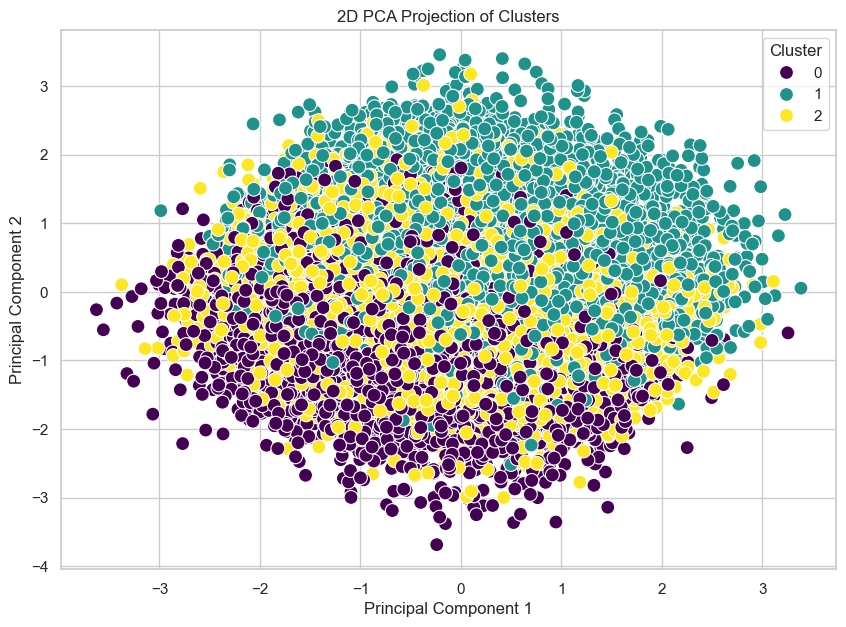

In [22]:
from sklearn.decomposition import PCA

def visualize_clusters(data, cluster_labels):
    # Reduksi dimensi dengan PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    
    # Buat DataFrame untuk visualisasi
    pca_df = pd.DataFrame(data=principal_components, 
                         columns=['Principal Component 1', 'Principal Component 2'])
    pca_df['Cluster'] = cluster_labels
    
    # Visualisasi
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='Principal Component 1', y='Principal Component 2',
                   hue='Cluster', data=pca_df, 
                   palette='viridis', s=100)
    plt.title('2D PCA Projection of Clusters')
    plt.show()

# Jalankan visualisasi
visualize_clusters(df_normalized, df['Cluster'])

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [23]:
# ========== 1. PREPROCESSING ULANG ==========

# Copy data asli agar tidak merusak df asli
df_original = df.copy()

# Label Encoding untuk kolom kategorik
label_encoders = {}
categorical_cols = df_original.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_original[col] = le.fit_transform(df_original[col])
    label_encoders[col] = le

# Simpan kolom numerik
numerical_cols = df_original.select_dtypes(include=['int64', 'float64']).columns

# Standarisasi
scaler = StandardScaler()
df_scaled = df_original.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# ========== 2. CLUSTERING ==========
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# ========== 3. INVERSE TRANSFORM ==========
# Inverse transform data numerik
df_scaled[numerical_cols] = scaler.inverse_transform(df_scaled[numerical_cols])

# Inverse transform data kategorikal
for col in categorical_cols:
    df_scaled[col] = label_encoders[col].inverse_transform(df_scaled[col])

# ========== 4. INTERPRETASI KLASTER ==========
# Gabungkan label cluster ke data asli
df_result = df_scaled.copy()

# Lihat karakteristik setiap klaster
for i in range(df_result['Cluster'].nunique()):
    print(f"\n=== Cluster {i} ===")
    cluster_data = df_result[df_result['Cluster'] == i]
    print("Jumlah data:", cluster_data.shape[0])
    print(cluster_data.describe(include='all').T[['mean', 'std', 'min', 'max']])


=== Cluster 0 ===
Jumlah data: 6682
                                     mean          std     min      max
Gender                                NaN          NaN     NaN      NaN
Age                             31.501796     8.068414    18.0     45.0
Sleep duration                   6.979572     1.739919     4.0     10.0
Sleep quality                    3.001796     1.403375     1.0      5.0
Stress level                     2.976504     1.415341     1.0      5.0
Blood pressure                        NaN          NaN     NaN      NaN
Heart rate                      79.881473    11.829504    60.0    100.0
Daily steps                  10611.044597  5738.033368  1000.0  20000.0
Physical activity               89.966327    52.268789     0.0    180.0
Height                          174.78704    14.705592   150.0    200.0
Weight                          75.011972    14.772267    50.0    100.0
Sleep disorder                        NaN          NaN     NaN      NaN
Wake up during night       

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [30]:
# Misal ini data awal
data = pd.read_csv('Data/Dataset.csv')
numerical_cols = ['Age', 'Sleep duration', 'Heart rate', 'Daily steps']

# Normalisasi
scaler = StandardScaler()
df_scaled = data.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Inverse transform (kembalikan ke skala asli)
df_scaled[numerical_cols] = scaler.inverse_transform(df_scaled[numerical_cols])


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [31]:
for i in range(df_result['Cluster'].nunique()):
    print(f"\n=== Cluster {i} ===")
    cluster_data = df_result[df_result['Cluster'] == i]
    print("Jumlah data:", cluster_data.shape[0])
    print(cluster_data.describe(include='all').T[['mean', 'std', 'min', 'max']])



=== Cluster 0 ===
Jumlah data: 6682
                                     mean          std     min      max
Gender                                NaN          NaN     NaN      NaN
Age                             31.501796     8.068414    18.0     45.0
Sleep duration                   6.979572     1.739919     4.0     10.0
Sleep quality                    3.001796     1.403375     1.0      5.0
Stress level                     2.976504     1.415341     1.0      5.0
Blood pressure                        NaN          NaN     NaN      NaN
Heart rate                      79.881473    11.829504    60.0    100.0
Daily steps                  10611.044597  5738.033368  1000.0  20000.0
Physical activity               89.966327    52.268789     0.0    180.0
Height                          174.78704    14.705592   150.0    200.0
Weight                          75.011972    14.772267    50.0    100.0
Sleep disorder                        NaN          NaN     NaN      NaN
Wake up during night       

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0
Jumlah data: 6.682 data

- **Rata-rata Age**                  : 31.5 tahun
- **Rata-rata Sleep Duration**       : 7.0 jam
- **Rata-rata Sleep Quality**        : 3.0 dari 5
- **Rata-rata Stress Level**         : 3.0 dari 5
- **Rata-rata Heart Rate**           : 79.9 bpm
- **Rata-rata Daily Steps**          : 10.611 langkah
- **Rata-rata Physical Activity**    : 90 menit
- **Rata-rata Average Screen Time**  : 5.46 jam/hari
- **Analisis**                       : Cluster ini berisi individu dengan gaya hidup cukup aktif (langkah & aktivitas fisik tinggi), kualitas tidur menengah, serta tingkat stres sedang. Ini bisa jadi kelompok yang seimbang namun masih memiliki potensi peningkatan kualitas tidur. Kampanye edukasi gaya hidup sehat dapat ditargetkan ke segmen ini.

## Cluster 1
Jumlah data: 6.628 data

- **Rata-rata Age**                  : 31.4 tahun
- **Rata-rata Sleep Duration**       : 7.01 jam
- **Rata-rata Sleep Quality**        : 2.99 dari 5
- **Rata-rata Stress Level**         : 2.99 dari 5
- **Rata-rata Heart Rate**           : 79.9 bpm
- **Rata-rata Daily Steps**          : 10.509 langkah
- **Rata-rata Physical Activity**    : 90.76 menit
- **Rata-rata Average Screen Time**  : 5.54 jam/hari
- **Analisis**                       : Ciri-ciri Cluster 1 sangat mirip dengan Cluster 0, namun sedikit lebih tinggi pada screen time. Hal ini bisa mengarah pada risiko kelelahan mata atau gangguan tidur. Intervensi untuk membatasi screen time dan mempromosikan kebiasaan tidur sehat bisa tepat untuk cluster ini.

## Cluster 2
Jumlah data: 6.690 data

- **Rata-rata Age**                  : 31.3 tahun
- **Rata-rata Sleep Duration**       : 7.00 jam
- **Rata-rata Sleep Quality**        : 3.00 dari 5
- **Rata-rata Stress Level**         : 3.01 dari 5
- **Rata-rata Heart Rate**           : 79.9 bpm
- **Rata-rata Daily Steps**          : 10.491 langkah
- **Rata-rata Physical Activity**    : 89.49 menit
- **Rata-rata Average Screen Time**  : 5.56 jam/hari
- **Analisis**                       : Cluster ini tampak sangat mirip dengan cluster lain, namun memiliki sedikit lebih tinggi stres. Ini dapat menjadi indikator awal potensi masalah kesehatan mental ringan, sehingga cocok ditargetkan dengan program manajemen stres atau mindfulness.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
df.to_csv('Data_clustering.csv', index=False)

print("Data berhasil disimpan sebagai 'Data_clustering.csv'")


Data berhasil disimpan sebagai 'Data_clustering.csv'
